In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#displaly just below. will avoid plt.show()
%matplotlib inline

In [3]:
birthdata = pd.read_csv('E:\Amila\Predictive Analytics\L&D\Births2015.csv',index_col = [0] , parse_dates = [0])

In [4]:
birthdata.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [6]:
#give stat of dataset
birthdata.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


ARIMA - Autoregressive integrated moving average

AR  (p)  - current valu is corelated with previous value / previous value is best reflection of the curret value
firsh check corection with previous value (first order) is yes move to 2nd. if there is no correation present then use p=2 
(if there is coretion is is bias and affect future)
I   (d)  - Order of difference / remove trend seasonal componet and make seris stationary 
MA  (q)  - smooting the value by removing errors / noice 

In [7]:
birthdata_train = birthdata[0:300]
birthdata_test = birthdata[300:]

In [ ]:
import pmdarima as pm
#by default auto arima uses AIC,the lower aic the model is good
model = pm.auto_arima(birthdata,
                      m = 12, seasonal = True,
                      start_p = 0,start_q=0,max_order=6,test='adf',error_action = 'ignore',
                      suppress_warnings =True,
                      stepwise =True,trace = True)

In [ ]:
model.summary()

In [ ]:
model.params()

In [ ]:
birth_model_fit = model.fit(birthdata_train)

In [ ]:
forecast = birth_model_fit.predict(n_periods=65,return_conf_int=True)
#return_conf_int is True means it will print the confidance interval too
#in forecasting model we always takes the confidence interval into the account

In [ ]:
forecast

In [ ]:
forecast_df = pd.DataFrame(forecast[0])

In [ ]:
forecast_df

In [87]:
forecast_df = pd.DataFrame(forecast[0],index=birthdata_test.index,columns=['births'])

In [88]:
forecast_df

,births
date,
2015-10-28,13700.749274
2015-10-29,14655.872073
2015-10-30,15118.923528
2015-10-31,12445.938361
2015-11-01,11941.602785
...,...
2015-12-27,11767.210626
2015-12-28,11767.210626
2015-12-29,11767.210626


<AxesSubplot:xlabel='date'>

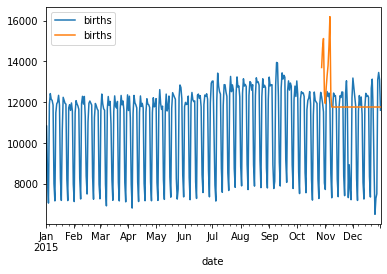

In [99]:
pd.concat([birthdata['births'],forecast_df],axis=1).plot()

In [90]:
birth_model_fit.aic

<function pmdarima.arima.arima.ARIMA.aic(self)>

In [91]:
birthdata_forecast =  birth_model_fit.predict(n_periods=65,return_conf_int=True)[0]

In [92]:
birthdata_forecast

array([13700.74927374, 14655.87207332, 15118.92352841, 12445.93836122,
       11941.60278463, 12747.45905775, 13320.52455127, 13801.99081384,
       14781.15916278, 16190.88462932, 12355.71826717, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
       11767.21062555, 11767.21062555, 11767.21062555, 11767.21062555,
      

In [93]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [94]:
birthdata_forecast_error = mean_squared_error(birthdata_test , birthdata_forecast)
birthdata_forecast_error = np.sqrt(birthdata_forecast_error)

In [95]:
birthdata_forecast_error

2601.078562144418